# Exploratory work on Planetary Computer - Microsoft datasets

https://planetarycomputer.microsoft.com/

FastAPI (Swagger doc):
https://planetarycomputer.microsoft.com/api/stac/v1/docs

## MODIS Thermal Anomalies/Fire 8-Day

## MODIS mod14a2v061

https://lpdaac.usgs.gov/products/mod14a2v061/

## MODIS Collection 6 and Collection 6.1
https://lpdaac.usgs.gov/documents/1005/MOD14_User_Guide_V61.pdf


###  Level 3 8-Day Summary Fire Products: MOD14A2 (Terra) and MYD14A2 (Aqua)
**The MODIS daily Level 3 8-day summary fire product is tile-based**, with each product file spanning
one of the 460 MODIS tiles, of which 326 contain land pixels. The product is a 1-km gridded
composite of fire pixels detected in each grid cell during the 8-day compositing period.
Figure 5 shows the 8-day summary fire mask from the 8-day Level 3 Terra fire product spanning
29 August–5 September 2001.

### MOD14 and MYD14
MOD14/MYD14 is the most basic fire product in which active fires and other thermal anomalies,
such as volcanoes, are identified. The Level 2 product is defined in the MODIS orbit geometry
covering an area of approximately 2340 by 2030 km in the across- and along-track directions, respectively. It is used to generate all of the higher-level fire products.

### Fire Mask
The fire mask is the principle component of the Level 2 MODIS fire product, and is stored as an
8-bit unsigned integer Scientific Data Set (SDS) named “fire mask”. In it, individual 1-km pixels
are assigned one of nine classes. The meaning of each class is listed in Table 3.

#### Table 3: MOD14/MYD14 fire mask pixel classes.

 **Class Meaning**

*   0 not processed (missing input data)
*   1 not processed (obsolete; not used since Collection 1)
*   2 not processed (other reason)
*   3 non-fire water pixel
*   4 cloud (land or water)
*   5 non-fire land pixel
*   6 unknown (land or water)
*   7 fire (low confidence, land or water)
*   8 fire (nominal confidence, land or water)
*   9 fire (high confidence, land or water)



## Notebooks
### https://github.com/microsoft/PlanetaryComputerExamples/tree/main/datasets/modis

# Accessing MODIS fire data with the Planetary Computer STAC API
https://planetarycomputer.microsoft.com/dataset/modis-14A2-061#Example-Notebook

In [1]:
!pip install odc-stac
!pip install planetary_computer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 kB 553.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.6/181.6 kB 10.8 MB/s eta 0:00:00


In [2]:
import odc.stac
import planetary_computer
import pystac_client
import rich.table

In [3]:
catalog = pystac_client.Client.open(
    "https://planetarycomputer.microsoft.com/api/stac/v1",
    modifier=planetary_computer.sign_inplace,
)

In [9]:
# Thirty Five Fire in California, 2023
latitude = 40.6682
longitude = -123.6452
location = [longitude, latitude]
geometry = {
    "type": "Point",
    "coordinates": location,
}
datetimes = [
    "2023-08-17",
    "2023-08-24",
    "2023-08-31",
    "2023-09-07",
    "2023-09-14",
    "2023-09-21",
]

buffer = 0
bbox_of_interest = [longitude - buffer, latitude - buffer, longitude + buffer, latitude + buffer]

In [10]:
items = dict()

# Fetch the collection of interest and print available items
for datetime in datetimes:
    print(f"Fetching {datetime}")
    search = catalog.search(
        collections=["modis-14A2-061"],
        intersects=geometry,
        datetime=datetime,
    )
    items[datetime] = search.get_all_items()[0]

print(items)

Fetching 2023-08-17
Fetching 2023-08-24


/usr/local/lib/python3.10/dist-packages/pystac_client/item_search.py:850: FutureWarning: get_all_items() is deprecated, use item_collection() instead.
  warnings.warn(


Fetching 2023-08-31
Fetching 2023-09-07
Fetching 2023-09-14
Fetching 2023-09-21
{'2023-08-17': <Item id=MYD14A2.A2023225.h08v04.061.2023235003329>, '2023-08-24': <Item id=MYD14A2.A2023233.h08v04.061.2023242000621>, '2023-08-31': <Item id=MYD14A2.A2023241.h08v04.061.2023251181736>, '2023-09-07': <Item id=MYD14A2.A2023249.h08v04.061.2023258000152>, '2023-09-14': <Item id=MYD14A2.A2023257.h08v04.061.2023265235849>, '2023-09-21': <Item id=MYD14A2.A2023257.h08v04.061.2023265235849>}


In [11]:
t = rich.table.Table("Key", "Title")
for key, asset in items["2023-08-17"].assets.items():
    t.add_row(key, asset.title)
t

┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Key              ┃ Title                                             ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ QA               │ Pixel quality indicators                          │
│ hdf              │ Source data containing all bands                  │
│ FireMask         │ Confidence of fire                                │
│ metadata         │ Federal Geographic Data Committee (FGDC) Metadata │
│ tilejson         │ TileJSON with default rendering                   │
│ rendered_preview │ Rendered preview                                  │
└──────────────────┴───────────────────────────────────────────────────┘

In [12]:
data = odc.stac.load(
    items.values(),
    crs="EPSG:3857",
    bbox=bbox_of_interest,
    bands="FireMask",
    resolution=1000,
)
data = data.where(data < 10, drop=True)
data

<xarray.Dataset>
Dimensions:      (time: 5, y: 1, x: 1)
Coordinates:
  * y            (y) float64 4.964e+06
  * x            (x) float64 -1.376e+07
    spatial_ref  int32 3857
  * time         (time) datetime64[ns] 2023-08-13 2023-08-21 ... 2023-09-14
Data variables:
    FireMask     (time, y, x) float32 8.0 5.0 5.0 5.0 5.0

<ipython-input-13-3d64f822a1e0>:7: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.
  for ax, datetime in zip(g.axes.flat, datetimes):


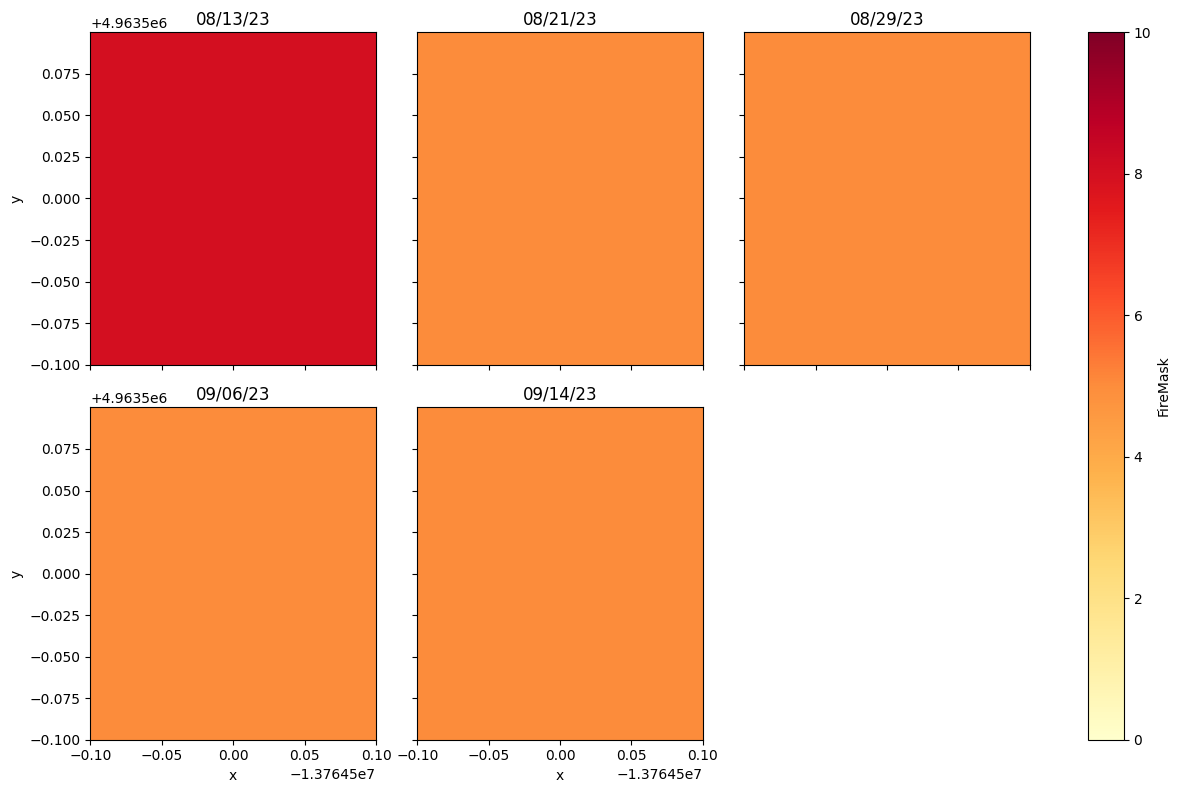

In [13]:
g = data["FireMask"].plot.imshow(
    cmap="YlOrRd", col="time", vmin=0, vmax=10, col_wrap=3, size=4
)

datetimes = data["FireMask"].time.to_pandas().dt.strftime("%D")

for ax, datetime in zip(g.axes.flat, datetimes):
    ax.set_title(datetime)

In [ ]:
# Now I am going to search with timerange

In [ ]:
# Thirty Five Fire in California, 2023
latitude = 40.6682
longitude = -123.6452
location = [longitude, latitude]
geometry = {
    "type": "Point",
    "coordinates": location,
}
time_of_interest = "2023-08-17/2023-09-21"

buffer = 0
bbox_of_interest = [longitude - buffer, latitude - buffer, longitude + buffer, latitude + buffer]

In [ ]:
stac_items = catalog.search(
    intersects=geometry,
    collections=["modis-14A2-061"],
    datetime=time_of_interest
).item_collection()

In [ ]:
data = odc.stac.load(
    # items.values(),
    stac_items,
    crs="EPSG:3857",
    bbox=bbox_of_interest,
    bands="FireMask",
    resolution=1000,
)
data = data.where(data < 10, drop=True)
data

<xarray.Dataset>
Dimensions:      (time: 5, y: 295, x: 224)
Coordinates:
  * y            (y) float64 5.112e+06 5.11e+06 5.11e+06 ... 4.818e+06 4.818e+06
  * x            (x) float64 -1.388e+07 -1.387e+07 ... -1.365e+07 -1.365e+07
    spatial_ref  int32 3857
  * time         (time) datetime64[ns] 2023-08-13 2023-08-21 ... 2023-09-14
Data variables:
    FireMask     (time, y, x) float32 3.0 3.0 3.0 3.0 3.0 ... 0.0 0.0 0.0 0.0

<ipython-input-137-3d64f822a1e0>:7: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.
  for ax, datetime in zip(g.axes.flat, datetimes):


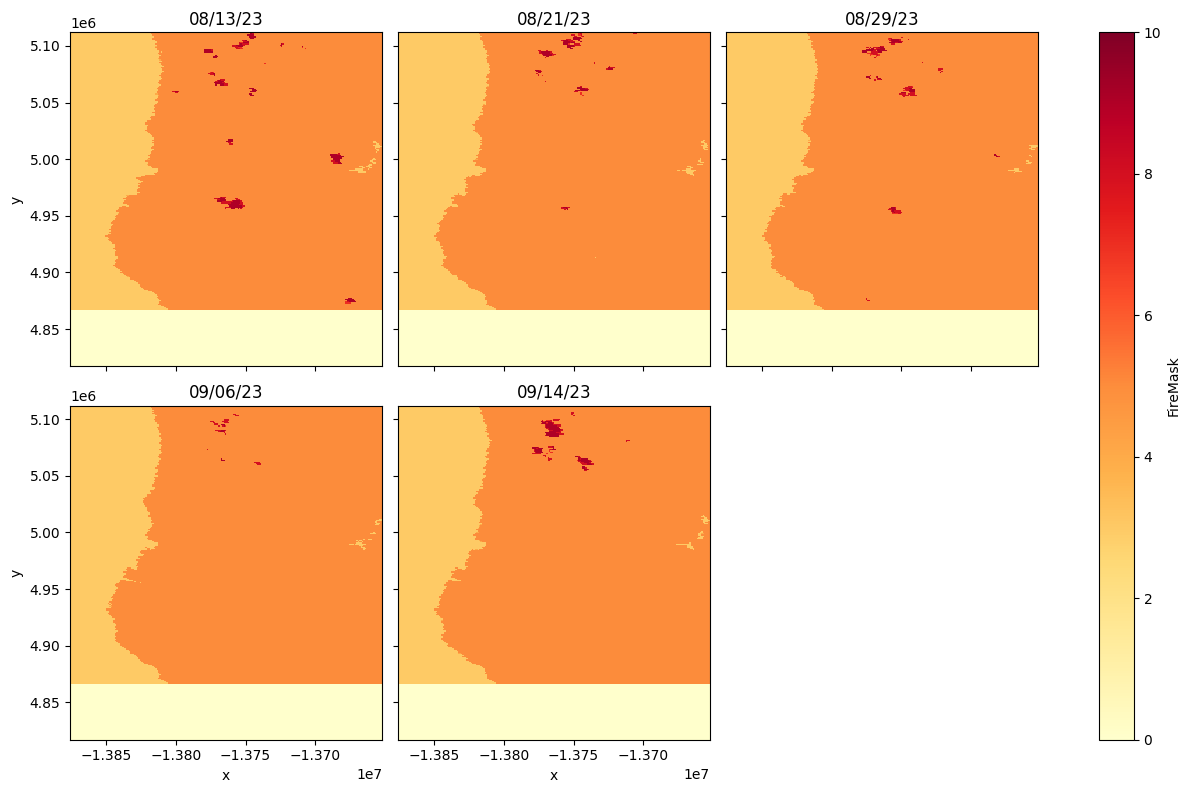

In [ ]:
g = data["FireMask"].plot.imshow(
    cmap="YlOrRd", col="time", vmin=0, vmax=10, col_wrap=3, size=4
)

datetimes = data["FireMask"].time.to_pandas().dt.strftime("%D")

for ax, datetime in zip(g.axes.flat, datetimes):
    ax.set_title(datetime)

# Accessing MODIS imagery data with the Planetary Computer STAC API

https://github.com/microsoft/PlanetaryComputerExamples/blob/main/datasets/modis/modis-imagery-example.ipynb

In [ ]:
import odc.stac
import planetary_computer
import shapely.geometry
import pystac_client
import rich.table

In [ ]:
catalog = pystac_client.Client.open(
    "https://planetarycomputer.microsoft.com/api/stac/v1",
    modifier=planetary_computer.sign_inplace,
)

In [ ]:
# Thirty Five Fire in California, 2023
latitude = 40.6682
longitude = -123.6452
location = shapely.geometry.Point(longitude, latitude)
bbox_of_interest = location.buffer(1).bounds

datetimes = [
    "2023-08-17",
    "2023-08-24",
    "2023-08-31",
    "2023-09-07",
    "2023-09-14",
    "2023-09-21",
]

buffer = 1

In [ ]:
items = dict()

# Fetch the collection of interest and print available items

for datetime in datetimes:
    print(f"Fetching {datetime}")
    search = catalog.search(
        collections=["modis-09A1-061"],
        intersects=location,
        datetime=datetime,
    )
    items[datetime] = search.item_collection()[0]

print(items)

Fetching 2023-08-17
Fetching 2023-08-24
Fetching 2023-08-31
Fetching 2023-09-07
Fetching 2023-09-14
Fetching 2023-09-21
{'2023-08-17': <Item id=MYD09A1.A2023225.h08v04.061.2023235043115>, '2023-08-24': <Item id=MYD09A1.A2023233.h08v04.061.2023242040416>, '2023-08-31': <Item id=MYD09A1.A2023241.h08v04.061.2023251221416>, '2023-09-07': <Item id=MYD09A1.A2023249.h08v04.061.2023258035856>, '2023-09-14': <Item id=MYD09A1.A2023257.h08v04.061.2023266035627>, '2023-09-21': <Item id=MYD09A1.A2023257.h08v04.061.2023266035627>}


In [ ]:
t = rich.table.Table("Key", "Title")
for key, asset in items["2023-08-17"].assets.items():
    t.add_row(key, asset.title)
t

┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Key                  ┃ Title                                               ┃
┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ hdf                  │ Source data containing all bands                    │
│ metadata             │ Federal Geographic Data Committee (FGDC) Metadata   │
│ sur_refl_b01         │ Surface Reflectance Band 1 (620-670 nm)             │
│ sur_refl_b02         │ Surface Reflectance Band 2 (841-876 nm)             │
│ sur_refl_b03         │ Surface Reflectance Band 3 (459-479 nm)             │
│ sur_refl_b04         │ Surface Reflectance Band 4 (545-565 nm)             │
│ sur_refl_b05         │ Surface Reflectance Band 5 (1230-1250 nm)           │
│ sur_refl_b06         │ Surface Reflectance Band 6 (1628-1652 nm)           │
│ sur_refl_b07         │ Surface Reflectance Band 7 (2105-2155 nm)           │
│ sur_refl_raz         │ MODIS relative azimuth angle                        │
│ sur_refl_szen        │ MODIS solar zenith angle                            │
│ sur_refl_vzen        │ MODIS view zenith angle                             │
│ sur_refl_qc_500m     │ Surface reflectance 500m band quality control flags │
│ sur_refl_state_500m  │ Surface reflectance 500m state flags                │
│ sur_refl_day_of_year │ Day of the year for the pixel                       │
│ tilejson             │ TileJSON with default rendering                     │
│ rendered_preview     │ Rendered preview                                    │
└──────────────────────┴─────────────────────────────────────────────────────┘

In [ ]:
RGB = ["sur_refl_b01", "sur_refl_b04", "sur_refl_b03"]

data = odc.stac.load(
    items.values(), crs="EPSG:3857", bbox=bbox_of_interest, resolution=1000, bands=RGB
)

data

<xarray.Dataset>
Dimensions:       (y: 295, x: 224, time: 5)
Coordinates:
  * y             (y) float64 5.112e+06 5.11e+06 ... 4.818e+06 4.818e+06
  * x             (x) float64 -1.388e+07 -1.387e+07 ... -1.365e+07 -1.365e+07
    spatial_ref   int32 3857
  * time          (time) datetime64[ns] 2023-08-13 2023-08-21 ... 2023-09-14
Data variables:
    sur_refl_b01  (time, y, x) int16 15 9 13 8 11 10 11 3 14 ... 0 0 0 0 0 0 0 0
    sur_refl_b04  (time, y, x) int16 77 76 71 67 73 72 72 68 ... 0 0 0 0 0 0 0 0
    sur_refl_b03  (time, y, x) int16 150 143 152 147 160 145 152 ... 0 0 0 0 0 0

In [ ]:
vis = data.odc.to_rgba(RGB, vmin=1, vmax=3000)

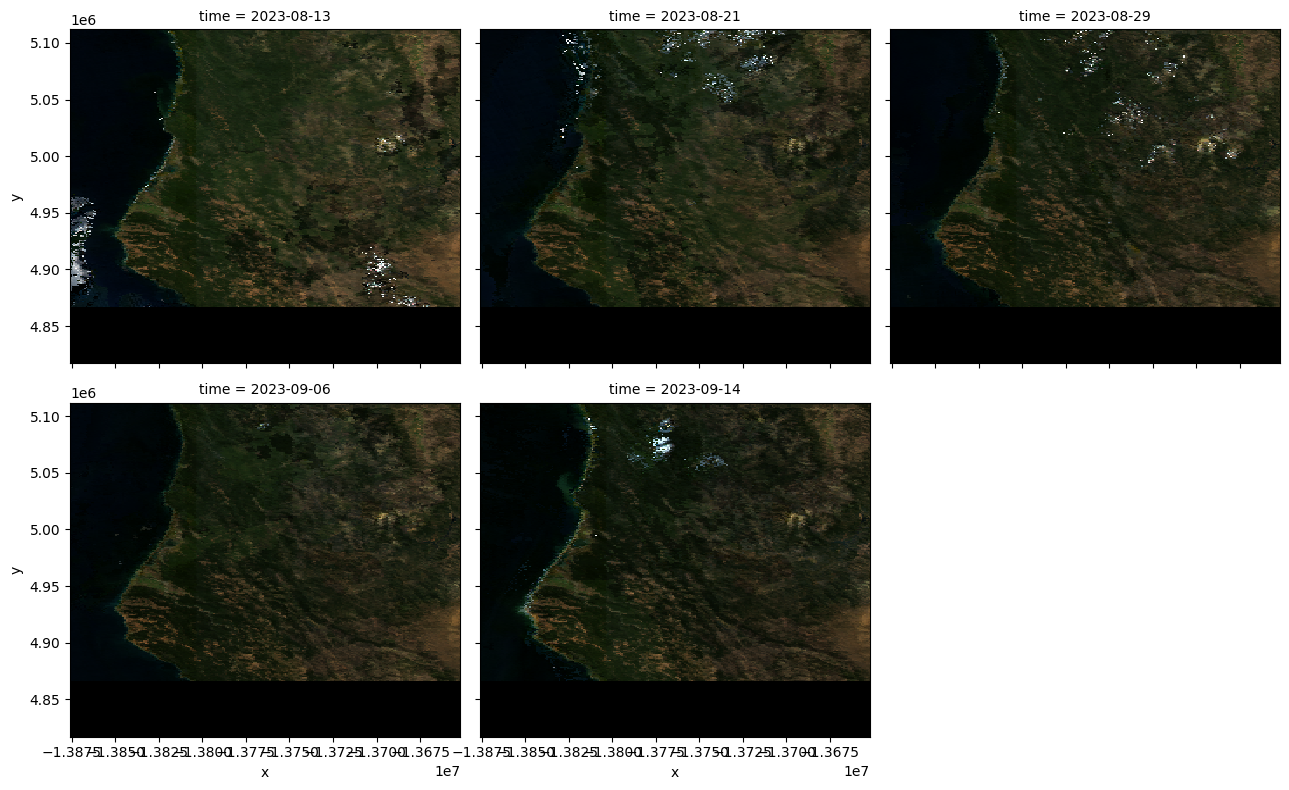

In [ ]:
vis.plot.imshow(col="time", rgb="band", col_wrap=3, robust=True, size=4);

In [ ]:
!pip install hvplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 11.2 MB/s eta 0:00:00


In [ ]:
import hvplot.xarray  # noqa: F401

hvplot_kwargs = {
    "frame_width": 250,
    "xaxis": None,
    "yaxis": None,
    "widget_location": "bottom",
    "aspect": len(data.x) / len(data.y),
}

vis.hvplot.rgb("x", "y", bands="band", groupby="time", **hvplot_kwargs)

/usr/local/lib/python3.10/dist-packages/holoviews/core/util.py:1585: PanelDeprecationWarning: 'param_value_if_widget' is deprecated and will be removed in version 1.4, use 'transform_reference' instead.
  value = param_value_if_widget(value)
/usr/local/lib/python3.10/dist-packages/holoviews/core/util.py:1585: PanelDeprecationWarning: 'param_value_if_widget' is deprecated and will be removed in version 1.4, use 'transform_reference' instead.
  value = param_value_if_widget(value)
/usr/local/lib/python3.10/dist-packages/holoviews/core/util.py:1585: PanelDeprecationWarning: 'param_value_if_widget' is deprecated and will be removed in version 1.4, use 'transform_reference' instead.
  value = param_value_if_widget(value)
/usr/local/lib/python3.10/dist-packages/holoviews/core/util.py:1585: PanelDeprecationWarning: 'param_value_if_widget' is deprecated and will be removed in version 1.4, use 'transform_reference' instead.
  value = param_value_if_widget(value)
/usr/local/lib/python3.10/dist-p

Column
    [0] HoloViews(DynamicMap, sizing_mode='fixed', widget_location='bottom')
    [1] WidgetBox(align=('center', 'end'))
        [0] DiscreteSlider(margin=(20, 20, 20, 20), name='time', options=OrderedDict([('2023-08-13 ...]), value=numpy.datetime64('2023-08-..., width=250)

/usr/local/lib/python3.10/dist-packages/holoviews/core/util.py:1585: PanelDeprecationWarning: 'param_value_if_widget' is deprecated and will be removed in version 1.4, use 'transform_reference' instead.
  value = param_value_if_widget(value)
/usr/local/lib/python3.10/dist-packages/holoviews/core/util.py:1585: PanelDeprecationWarning: 'param_value_if_widget' is deprecated and will be removed in version 1.4, use 'transform_reference' instead.
  value = param_value_if_widget(value)
/usr/local/lib/python3.10/dist-packages/holoviews/core/util.py:1585: PanelDeprecationWarning: 'param_value_if_widget' is deprecated and will be removed in version 1.4, use 'transform_reference' instead.
  value = param_value_if_widget(value)
/usr/local/lib/python3.10/dist-packages/holoviews/core/util.py:1585: PanelDeprecationWarning: 'param_value_if_widget' is deprecated and will be removed in version 1.4, use 'transform_reference' instead.
  value = param_value_if_widget(value)
/usr/local/lib/python3.10/dist-p

## Accessing Landsat Collection 2 Level-1 and Level-2 data with the Planetary Computer STAC API

https://github.com/microsoft/PlanetaryComputerExamples/blob/main/datasets/landsat-c2/landsat-c2-example.ipynb

In [ ]:
import pystac_client
import planetary_computer
import odc.stac
import matplotlib.pyplot as plt

from pystac.extensions.eo import EOExtension as eo

In [ ]:
catalog = pystac_client.Client.open(
    "https://planetarycomputer.microsoft.com/api/stac/v1",
    modifier=planetary_computer.sign_inplace,
)

In [ ]:
# Choose an area and time of interest

# Thirty Five Fire in California, 2023
latitude = 40.6682
longitude = -123.6452
location = [longitude, latitude]
geometry = {
    "type": "Point",
    "coordinates": location,
}
time_of_interest = "2023-08-17/2023-09-21"

buffer = 1
bbox_of_interest = [longitude - buffer, latitude - buffer, longitude + buffer, latitude + buffer]

In [ ]:
search = catalog.search(
    collections=["landsat-c2-l2"],
    bbox=bbox_of_interest,
    datetime=time_of_interest,
    query={"eo:cloud_cover": {"lt": 10}},
)

items = search.item_collection()
print(f"Returned {len(items)} Items")

Returned 13 Items


In [ ]:
selected_item = min(items, key=lambda item: eo.ext(item).cloud_cover)

print(
    f"Choosing {selected_item.id} from {selected_item.datetime.date()}"
    + f" with {selected_item.properties['eo:cloud_cover']}% cloud cover"
)

Choosing LE07_L2SP_045032_20230913_02_T1 from 2023-09-13 with 0.0% cloud cover


In [ ]:
max_key_length = len(max(selected_item.assets, key=len))
for key, asset in selected_item.assets.items():
    print(f"{key.rjust(max_key_length)}: {asset.title}")

              qa: Surface Temperature Quality Assessment Band
             ang: Angle Coefficients File
             red: Red Band
            blue: Blue Band
            drad: Downwelled Radiance Band
            emis: Emissivity Band
            emsd: Emissivity Standard Deviation Band
            lwir: Surface Temperature Band
            trad: Thermal Radiance Band
            urad: Upwelled Radiance Band
           atran: Atmospheric Transmittance Band
           cdist: Cloud Distance Band
           green: Green Band
           nir08: Near Infrared Band 0.8
          swir16: Short-wave Infrared Band 1.6
          swir22: Short-wave Infrared Band 2.2
         mtl.txt: Product Metadata File (txt)
         mtl.xml: Product Metadata File (xml)
        cloud_qa: Cloud Quality Assessment Band
        mtl.json: Product Metadata File (json)
        qa_pixel: Pixel Quality Assessment Band
       qa_radsat: Radiometric Saturation and Dropped Pixel Quality Assessment Band
   atmos_opacity: 

In [ ]:
bands_of_interest = ["nir08", "red", "green", "blue", "qa_pixel", "lwir"]
data = odc.stac.stac_load(
    [selected_item], bands=bands_of_interest, bbox=bbox_of_interest
).isel(time=0)
data

<xarray.Dataset>
Dimensions:      (y: 7443, x: 5719)
Coordinates:
  * y            (y) float64 4.614e+06 4.614e+06 ... 4.391e+06 4.391e+06
  * x            (x) float64 3.589e+05 3.589e+05 ... 5.304e+05 5.304e+05
    spatial_ref  int32 32610
    time         datetime64[ns] 2023-09-13T16:31:50.406966
Data variables:
    nir08        (y, x) uint16 0 0 0 0 0 0 ... 14326 14795 14561 14326 14091
    red          (y, x) uint16 0 0 0 0 0 0 0 ... 8873 9097 8986 9097 9322 9097
    green        (y, x) uint16 0 0 0 0 0 0 0 ... 8911 9165 8911 9038 9165 8911
    blue         (y, x) uint16 0 0 0 0 0 0 0 ... 8572 8688 8572 8456 8572 8572
    qa_pixel     (y, x) uint16 1 1 1 1 1 1 1 ... 5440 5440 5440 5440 5440 5440
    lwir         (y, x) uint16 0 0 0 0 0 0 ... 44199 44200 44253 44254 44050

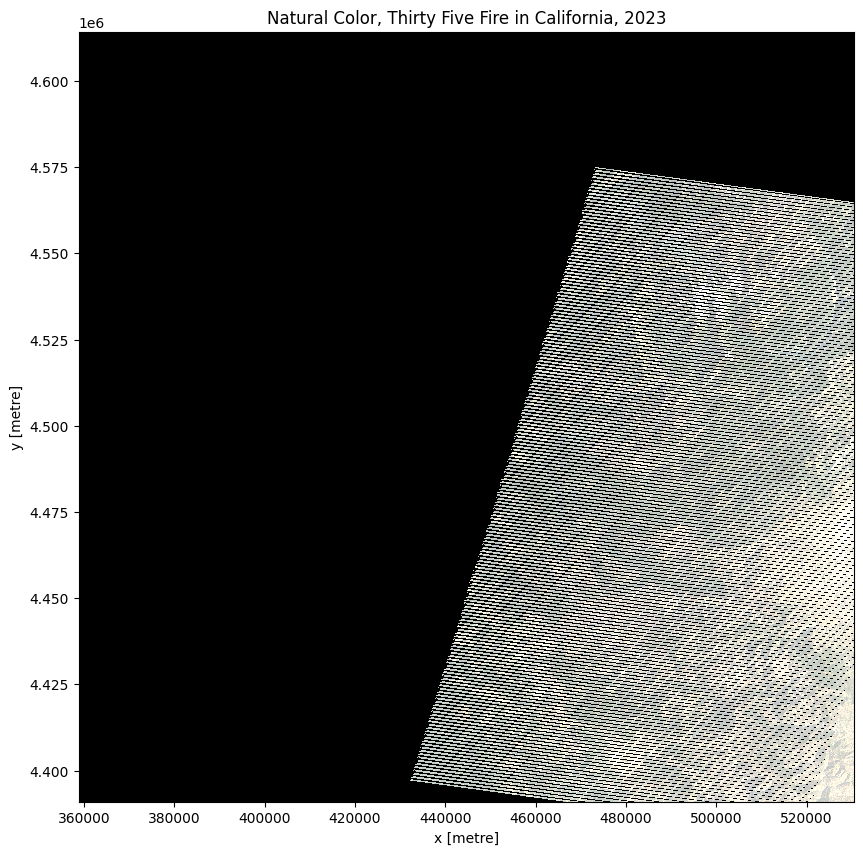

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

data[["red", "green", "blue"]].to_array().plot.imshow(robust=True, ax=ax)
ax.set_title("Natural Color, Thirty Five Fire in California, 2023");

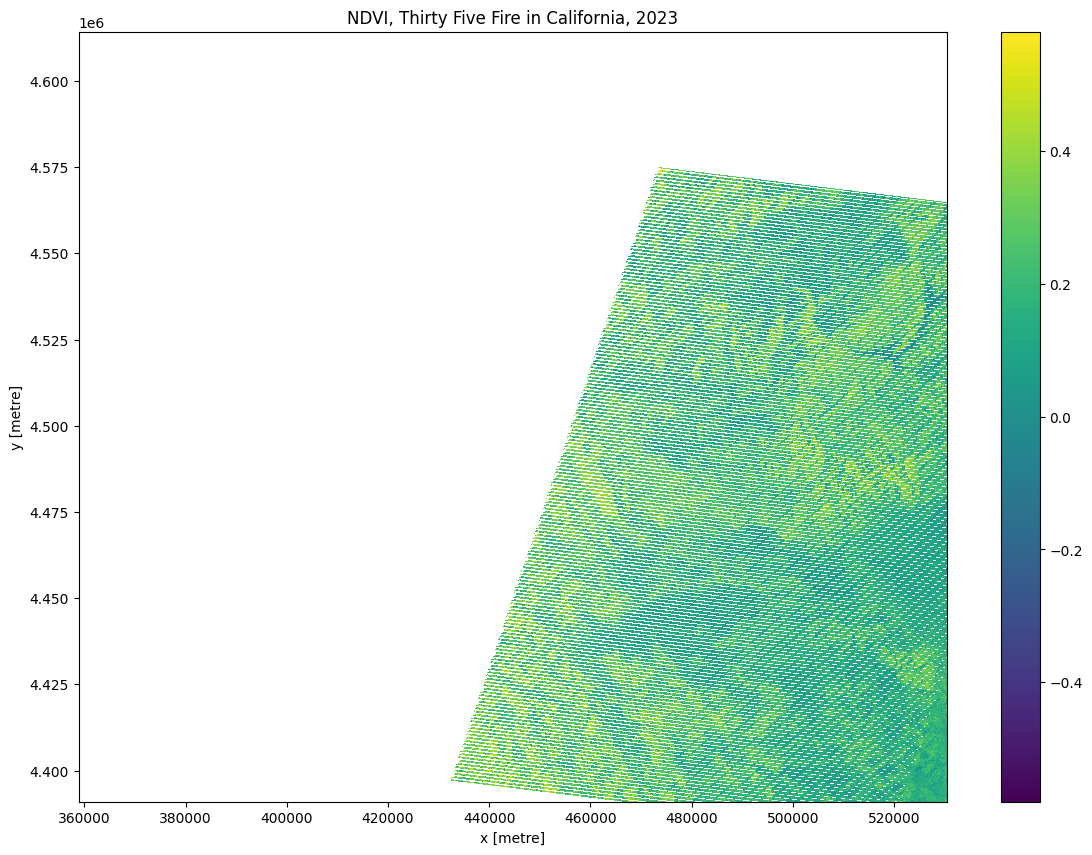

In [ ]:
red = data["red"].astype("float")
nir = data["nir08"].astype("float")
ndvi = (nir - red) / (nir + red)

fig, ax = plt.subplots(figsize=(14, 10))
ndvi.plot.imshow(ax=ax, cmap="viridis")
ax.set_title("NDVI, Thirty Five Fire in California, 2023");

In [ ]:
catalog.get_collection("landsat-c2-l2").summaries.to_dict()["platform"]

['landsat-4', 'landsat-5', 'landsat-7', 'landsat-8', 'landsat-9']

In [ ]:
search = catalog.search(
    collections=["landsat-c2-l2"],
    bbox=bbox_of_interest,
    datetime=time_of_interest,
    query={
        "eo:cloud_cover": {"lt": 10},
        "platform": {"in": ["landsat-8", "landsat-9"]},
    },
)
items = search.get_all_items()

/usr/local/lib/python3.10/dist-packages/pystac_client/item_search.py:850: FutureWarning: get_all_items() is deprecated, use item_collection() instead.
  warnings.warn(


In [ ]:
band_info = selected_item.assets["lwir"].extra_fields["raster:bands"][0]
band_info

{'unit': 'kelvin',
 'scale': 0.00341802,
 'nodata': 0,
 'offset': 149.0,
 'data_type': 'uint16',
 'spatial_resolution': 30}

In [ ]:
temperature = data["lwir"].astype(float)
temperature *= band_info["scale"]
temperature += band_info["offset"]
temperature[:5, :5]

<xarray.DataArray 'lwir' (y: 5, x: 5)>
array([[149., 149., 149., 149., 149.],
       [149., 149., 149., 149., 149.],
       [149., 149., 149., 149., 149.],
       [149., 149., 149., 149., 149.],
       [149., 149., 149., 149., 149.]])
Coordinates:
  * y            (y) float64 4.614e+06 4.614e+06 4.614e+06 4.614e+06 4.614e+06
  * x            (x) float64 3.589e+05 3.589e+05 3.59e+05 3.59e+05 3.59e+05
    spatial_ref  int32 32610
    time         datetime64[ns] 2023-09-13T16:31:50.406966
Attributes:
    nodata:   0

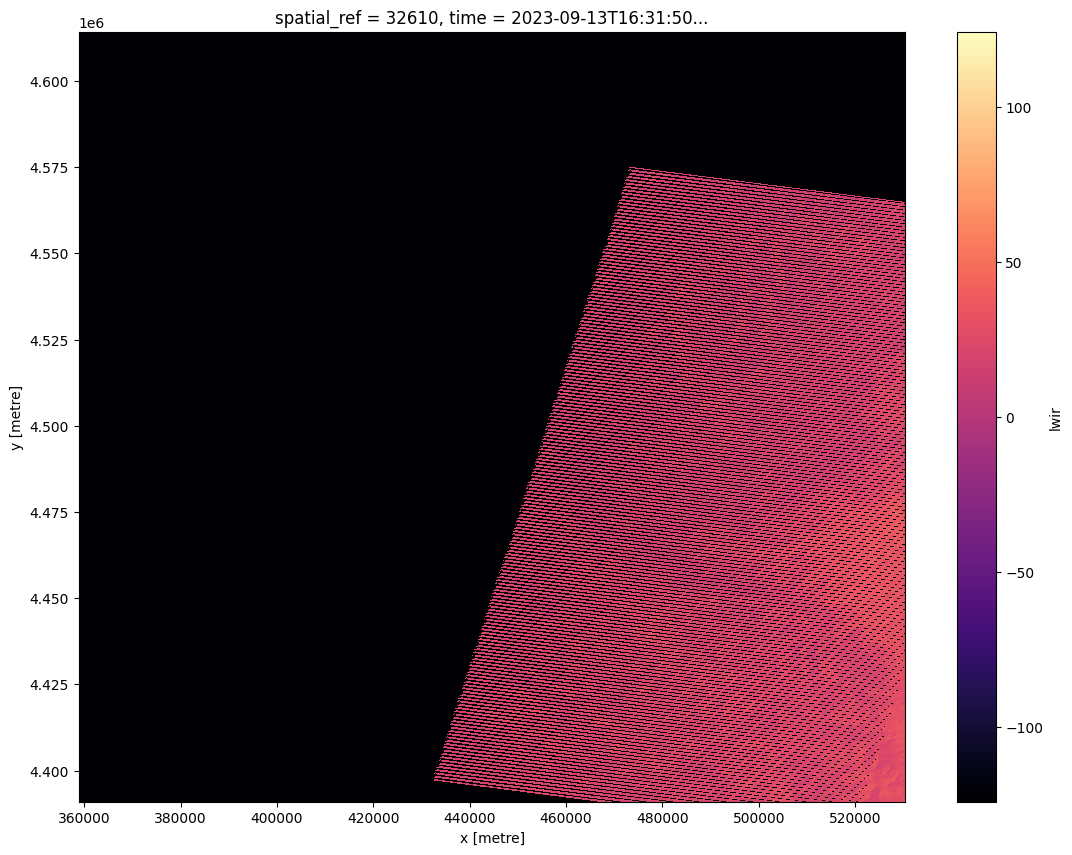

In [ ]:
celsius = temperature - 273.15
celsius.plot(cmap="magma", size=10);

## Landsat Collection 2 Level-1 Data

In [ ]:
search = catalog.search(
    collections=["landsat-c2-l1"],
    bbox=bbox_of_interest,
    query={"eo:cloud_cover": {"lt": 10}},
)

items = search.item_collection()
print(f"Returned {len(items)} Items")

Returned 1199 Items


In [ ]:
selected_item = min(items, key=lambda item: eo.ext(item).cloud_cover)

print(
    f"Choosing {selected_item.id} from {selected_item.datetime.date()}"
    + f" with {selected_item.properties['eo:cloud_cover']}% cloud cover"
)

Choosing LM05_L1TP_045033_20130101_02_T2 from 2013-01-01 with 0.0% cloud cover


In [ ]:
max_key_length = len(max(selected_item.assets, key=len))
for key, asset in selected_item.assets.items():
    print(f"{key.rjust(max_key_length)}: {asset.title}")

             red: Red Band
           green: Green Band
           nir08: Near Infrared Band 0.8
           nir09: Near Infrared Band 0.9
         mtl.txt: Product Metadata File (txt)
         mtl.xml: Product Metadata File (xml)
        mtl.json: Product Metadata File (json)
        qa_pixel: Pixel Quality Assessment Band
       qa_radsat: Radiometric Saturation and Dropped Pixel Quality Assessment Band
        tilejson: TileJSON with default rendering
rendered_preview: Rendered preview


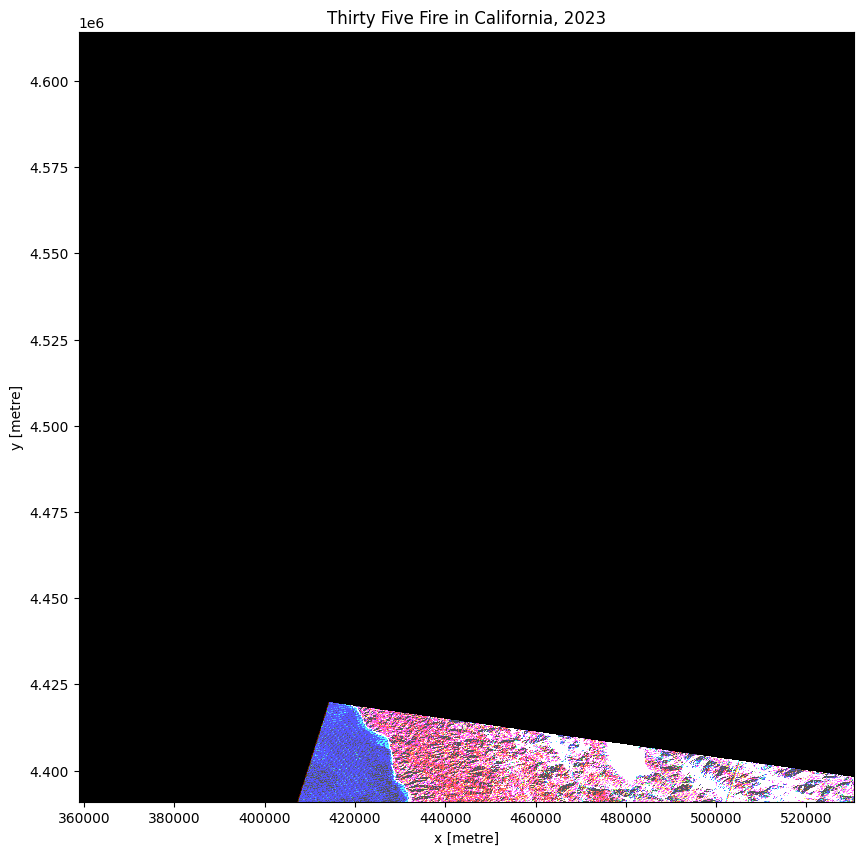

In [ ]:
bands_of_interest = ["nir08", "red", "green"]
data = odc.stac.stac_load(
    [selected_item], bands=bands_of_interest, bbox=bbox_of_interest
).isel(time=0)

cir = data.to_array()

fig, ax = plt.subplots(figsize=(10, 10))
cir.plot.imshow(robust=True, ax=ax)
ax.set_title("Thirty Five Fire in California, 2023");